The purpose of this notebook is to do the Statistical Rethinking 2022 [homework](https://github.com/rmcelreath/stat_rethinking_2022/tree/main/homework) using Python. This is my second pass through the course.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

In [2]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

<IPython.core.display.Javascript object>

# Q1

Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation.
Use the same flat prior as in the book.

## Answer

Grid approximation uses a limited set of parameter values. For the prior, we are specified to use one that is flat. The number of values is up to us. I'll do what the book does and use 20 values for p, from 0 to 1, equally spaced.

In [46]:
# assign p 11 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 20)
p_grid


array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<IPython.core.display.Javascript object>

Since they must sum to 1, the probability of each parameter value should be the same (1/11):

In [47]:
prior = [1 / 20] * 20
prior

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

<IPython.core.display.Javascript object>

Next we compute the likelihood, by plugging in a p value and computing the binomial probability distribution for each p. For our binomial distribution parameters, we are asked to assume the globe tossing data of 4 water and 11 land, hence k=4 and n=15.

In [48]:
lik = stats.binom.pmf(k=4, n=15, p=p_grid)
lik

array([0.00000000e+00, 5.77864737e-03, 4.93045222e-02, 1.28124878e-01,
       1.99100546e-01, 2.27571068e-01, 2.08838475e-01, 1.60403745e-01,
       1.05077111e-01, 5.89927545e-02, 2.82160516e-02, 1.13080894e-02,
       3.68665129e-03, 9.31677914e-04, 1.68659507e-04, 1.90920946e-05,
       1.04386027e-06, 1.53799270e-08, 9.43884072e-12, 0.00000000e+00])

<IPython.core.display.Javascript object>

In [49]:
# compute product of likelihood and prior
unstd_posterior = lik * prior

# standardized posterior
posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'p'),
 Text(0, 0.5, 'probability'),
 Text(0.5, 1.0, 'Posterior probability of water')]

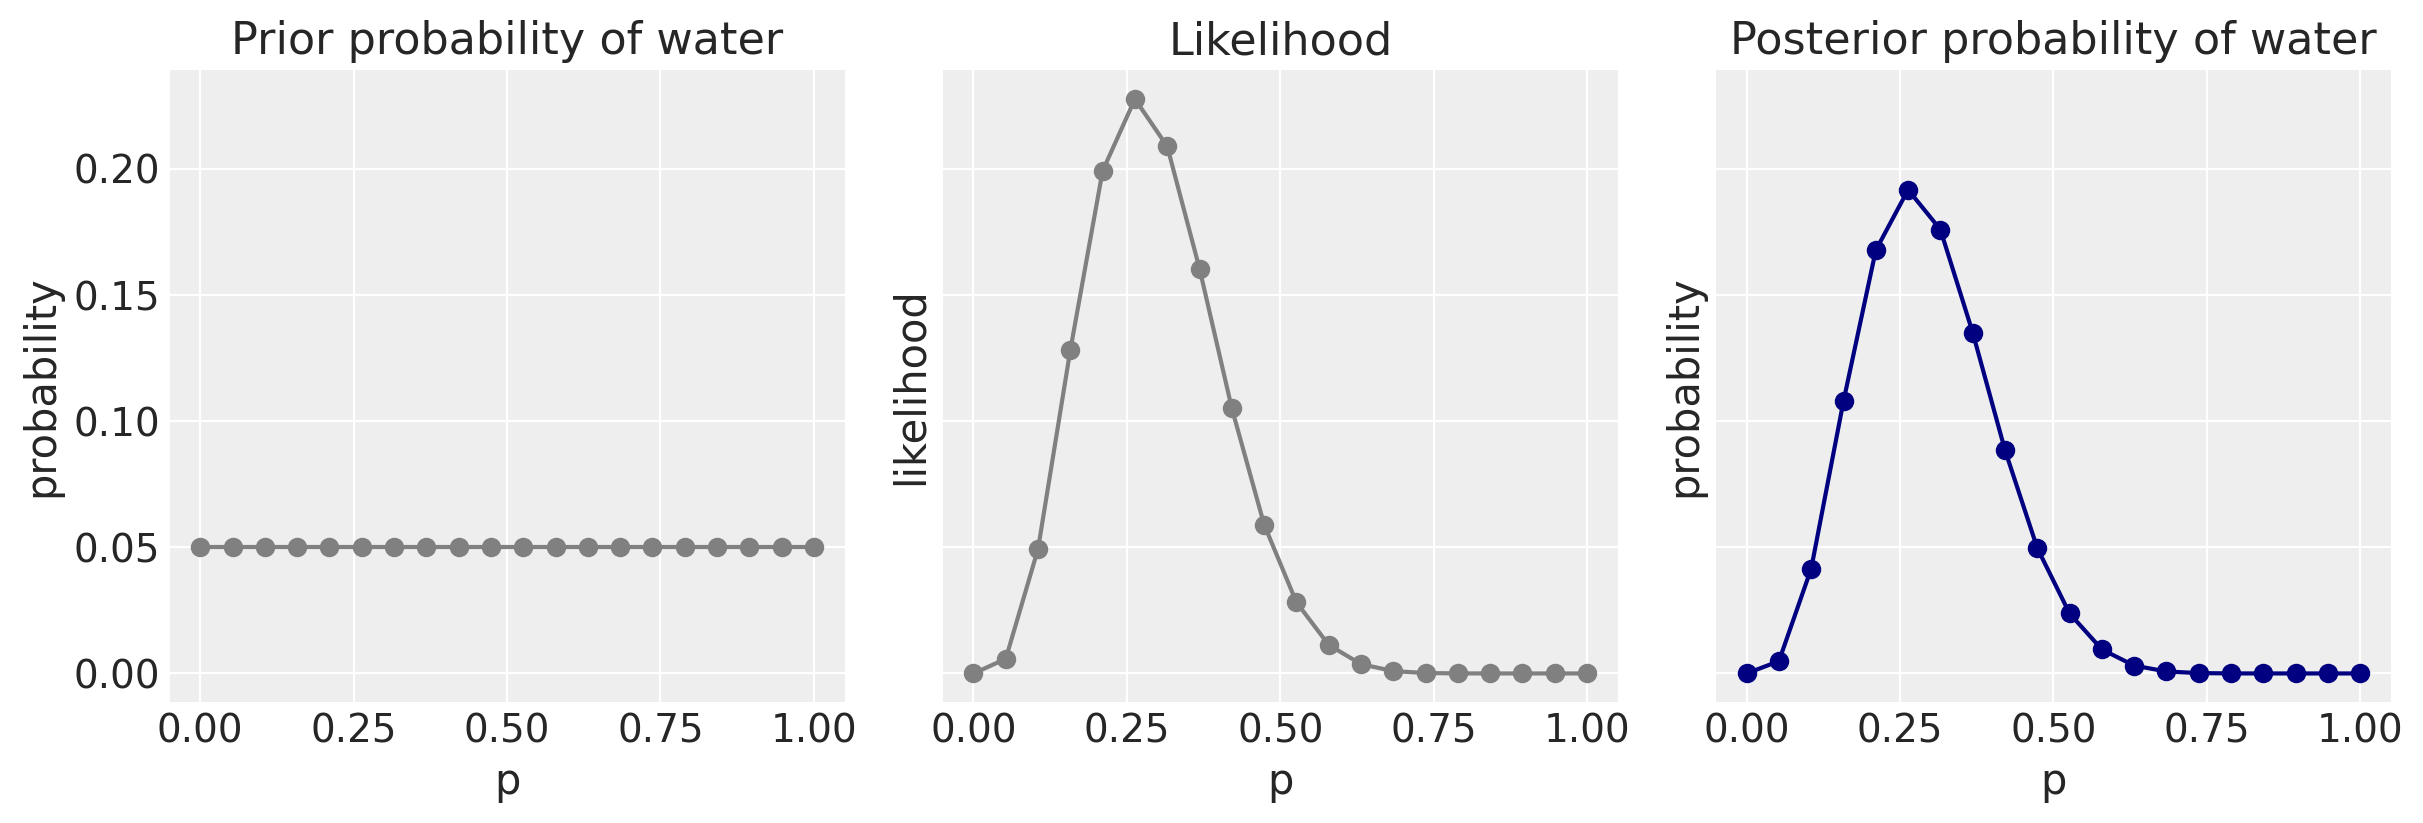

<IPython.core.display.Javascript object>

In [50]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
# prior
ax1.plot(p_grid, prior, '-o', color="gray")
ax1.set(xlabel='p', ylabel='probability', title='Prior probability of water')

# likelihood
ax2.plot(p_grid, lik, '-o', color="gray")
ax2.set(xlabel='p', ylabel='likelihood', title='Likelihood')

# posterior
ax3.plot(p_grid, posterior, '-o', color="navy")
ax3.set(xlabel='p', ylabel='probability', title='Posterior probability of water')

# Q2

Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water.

## Answer

The procedure to solve this is exactly the same with the exception of the prior. We can easily construct this like so.

In [8]:
# assign p 20 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 20)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<IPython.core.display.Javascript object>

In [64]:
# We can use boolean indexing to select the values of p that are greater than 0.5
prior = [int(i) for i in (p_grid > 0.5)]
# Make a proper prior (summing to 1)
prior = [i * (1 / np.sum(prior)) for i in prior]
prior

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1]

<IPython.core.display.Javascript object>

In [65]:
# Likelihood (doesn't change)
lik = stats.binom.pmf(k=4, n=6, p=p_grid)

# Compute product of likelihood and new prior
unstd_posterior = lik * prior

# standardized posterior
posterior = unstd_posterior / np.sum(unstd_posterior)
posterior

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12290291, 0.14217652, 0.15416941, 0.15601023, 0.1457234 ,
       0.12290291, 0.08949517, 0.05069123, 0.01592822, 0.        ])

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'p'),
 Text(0, 0.5, 'probability'),
 Text(0.5, 1.0, 'Posterior probability of water')]

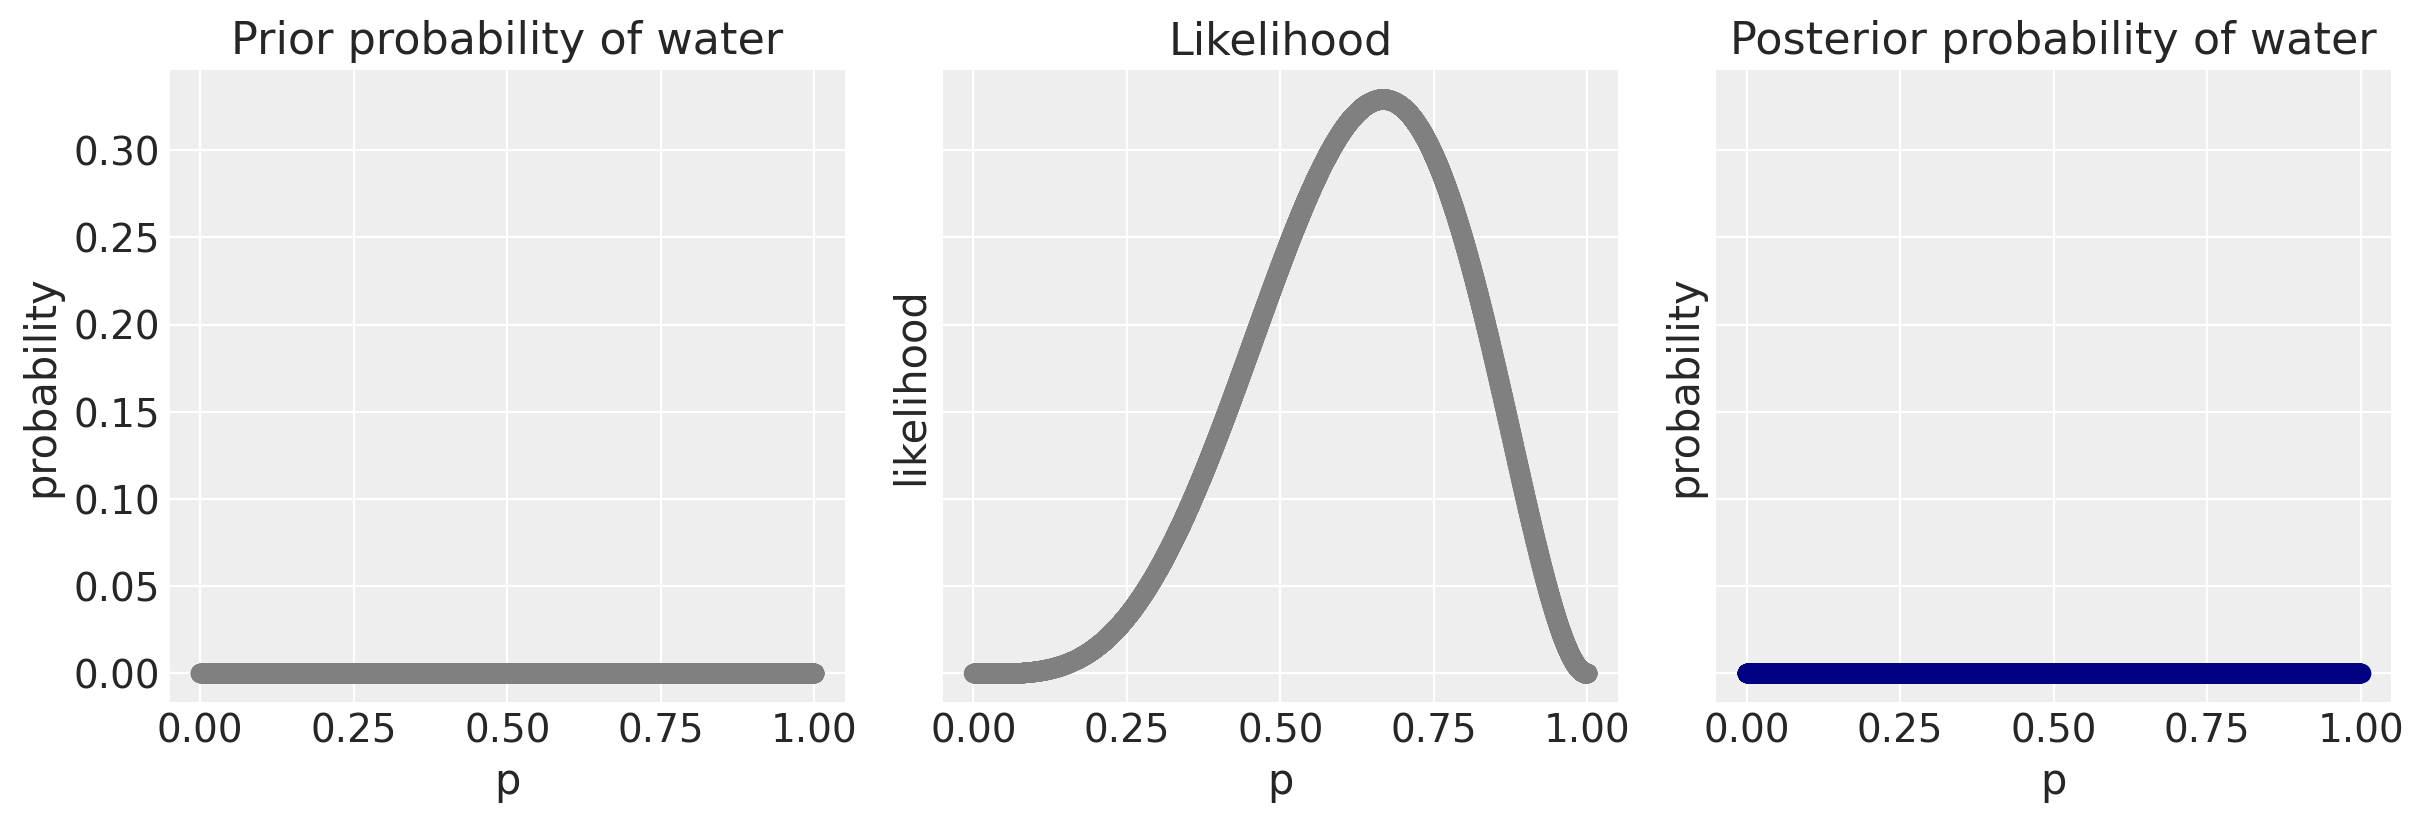

<IPython.core.display.Javascript object>

In [75]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
# prior
ax1.plot(p_grid, prior, '-o', color="gray")
ax1.set(xlabel='p', ylabel='probability', title='Prior probability of water')

# likelihood
ax2.plot(p_grid, lik, '-o', color="gray")
ax2.set(xlabel='p', ylabel='likelihood', title='Likelihood')

# posterior
ax3.plot(p_grid, posterior, '-o', color="navy")
ax3.set(xlabel='p', ylabel='probability', title='Posterior probability of water')

The new prior simply ignores some values when calculating the posterior.

# Q3

For the posterior distribution from 2, compute 89% percentile and HPDI intervals. Compare the widths of these intervals. Which is wider? Why? If you had only the information in the interval, what might you misunderstand about the shape of the posterior distribution?

## Answer

I'll make a denser grid so that this answer will make more sense.

In [67]:
# assign p 10000 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 10**4)
prior = [int(i) for i in (p_grid > 0.5)]
prior = [i * (1 / np.sum(prior)) for i in prior]  # proper prior
lik = stats.binom.pmf(k=4, n=6, p=p_grid)
unstd_posterior = lik * prior
posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

In [76]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
samples

array([0.57345735, 0.8519852 , 0.50755076, ..., 0.76037604, 0.65576558,
       0.50805081])

<IPython.core.display.Javascript object>

In [77]:
# middle 89%
np.percentile(samples, [5.5, 94.5])

array([0.52474697, 0.8809881 ])

<IPython.core.display.Javascript object>

In [78]:
# highest posterior density interval
az.hdi(samples, hdi_prob=0.89)

array([0.50045005, 0.84128413])

<IPython.core.display.Javascript object>

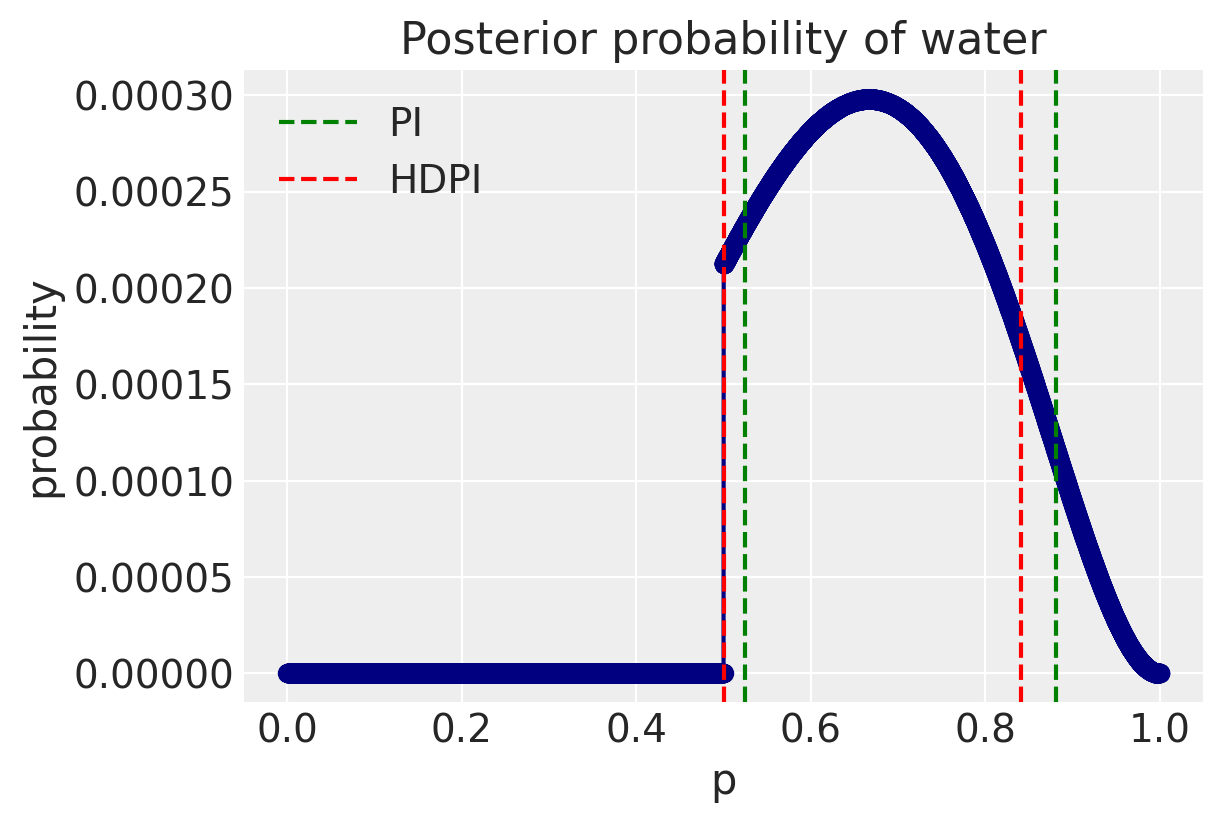

<IPython.core.display.Javascript object>

In [95]:
f, ax1 = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)

# posterior
ax1.plot(p_grid, posterior, '-o', color="navy")
ax1.set(xlabel='p', ylabel='probability', title='Posterior probability of water')

ax1.axvline(np.percentile(samples, [5.5, 94.5])[0], color='green', linestyle='dashed', label='PI')
ax1.axvline(np.percentile(samples, [5.5, 94.5])[1], color='green', linestyle='dashed')
ax1.axvline(az.hdi(samples, hdi_prob=0.89)[0], color='red', linestyle='dashed', label='HDPI')
ax1.axvline(az.hdi(samples, hdi_prob=0.89)[1], color='red', linestyle='dashed')
ax1.legend()

The percentile interval, the "89%" represents the 5.5 and 94.5 percentile bounds, but it can be misleading because it does not take the shape of the distribution into account.

HPDI interval is more narrow than the percentile interval because it focuses on the densest region which contains 89% of the parameters in the posterior distribution.

# Q4 (optional)

Suppose there is bias in sampling so that Land is more likely than Water to be recorded. Specifically, assume that 1-in-5 (20%) of Water samples are accidentally recorded instead as ”Land”. First, write a generative simulation of this sampling process. Assuming the true proportion of Water is 0.70, what proportion does your simulation tend to produce instead? Second, using a simulated sample of 20 tosses, compute the unbiased posterior distribution of the true proportion of water.

## Answer 1 (simulation)

The way I'd consider this would remind me of measurement error, covered in one of the later chapters of the book. I'd think of a DAG and see how we can see `W_obs` as a proxy for `W_true`. But let's go about it naively first.

For the generative process, we can simply take 80% of the outputted values as the true W number.

In [16]:
stats.binom.rvs(n=20, p=0.7, size=10) * 0.8

array([12.8,  8. , 11.2, 10.4, 10.4, 10.4, 14.4, 12. , 14.4,  8. ])

<IPython.core.display.Javascript object>

To get the proportion of observed water with this recording error, we can do this:

In [17]:
(stats.binom.rvs(n=20, p=0.7, size=10) * 0.8).mean() / 20

0.54

<IPython.core.display.Javascript object>

This feels a bit unsatisfying because this gives us back impossible values for counts (must be an integer).

Thinking on the lessons from Chapter 15, we know that `W_tr` results from the influence of `N` and `p`, but we will only observe `W_ob`. `W_ob` is a function of `W_tr` and an error from the recording process.

/Users/blacar/opt/anaconda3/envs/stats_rethinking/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


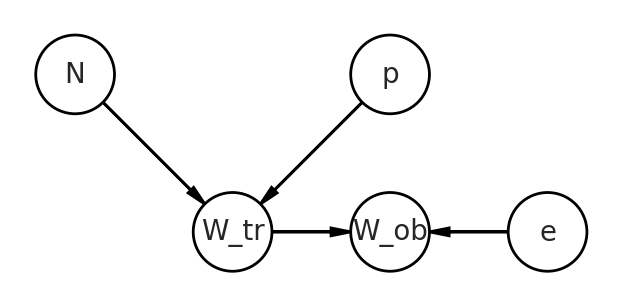

<IPython.core.display.Javascript object>

In [18]:
import daft
from causalgraphicalmodels import CausalGraphicalModel
pipe_dag = CausalGraphicalModel(
    nodes=["N", "p", "W_tr", "W_ob", "e"],
    edges=[
        ("N", "W_tr"),
        ("p", "W_tr"),
        ("W_tr", "W_ob"),
        ("e", "W_ob")
    ],
)
pgm = daft.PGM()

coordinates = {
    "N": (0, 1),
    "p": (2, 1),
    "W_tr": (1, 0),
    "W_ob": (2, 0),
    "e": (3, 0)
}
for node in pipe_dag.dag.nodes:
    pgm.add_node(node, node, *coordinates[node])
for edge in pipe_dag.dag.edges:
    pgm.add_edge(*edge)
pgm.render()

Concretely, we can think of the number of observed water as a second binomial equation: `W_obs` is distributed binomially, parameterized by `W_tr` and a different proportion value, what I'm calling `p_e`. The problem states that 20% of water samples are recorded by land, which is another way of saying that 80% of the water samples are actually water.

This is a form of measurement error and we can write these as equations.

$$ W_{ob} \sim \text{Binomial}(n_{ob}=W_{tr}, p_e=0.8) $$
$$ W_{tr} \sim \text{Binomial}(n_{tr}=20, p_{tr}=0.7) $$

In [40]:
# Generate dummy data
W_tr_dummy = stats.binom.rvs(n=20, p=0.7, size=100)
W_tr_dummy

array([15, 16, 15, 17, 13, 12, 10, 13, 16, 14, 14, 16, 16, 14, 16, 14, 15,
       13, 15, 11, 12, 13, 13, 13, 15, 13, 15, 13, 17, 13, 14, 14, 15, 16,
       14, 17, 12, 13, 17, 17, 18,  9, 14, 16, 15, 12, 14, 10, 16, 13, 11,
       11, 11, 13, 11, 14, 14, 18, 12, 16, 13, 10, 11, 12, 14, 15, 16, 14,
       13, 14, 16, 16,  8, 15, 12, 16, 11, 15, 13, 13, 15, 11, 17, 14, 15,
       15, 13, 15, 13, 10, 14, 17, 17, 16, 15, 15, 12, 17, 12, 12])

<IPython.core.display.Javascript object>

In [41]:
W_ob_dummy = np.floor(W_tr_dummy * 0.8)


<IPython.core.display.Javascript object>

In [42]:
W_ob_dummy = stats.binom.rvs(n=W_tr_dummy, p=0.8, size=100)
W_ob_dummy

array([13, 12,  8, 11, 10,  8,  9, 10, 14, 12,  8, 12, 11, 13, 16, 10, 11,
        9, 10,  8, 10, 12, 11, 10, 12, 11, 14,  8, 15, 11, 13, 14, 14, 15,
       13, 15, 10, 10, 14, 14, 14,  9, 11, 14, 13, 10, 11,  8, 12, 12,  9,
        9, 10, 11, 10, 11, 13, 17,  9, 15, 10,  7,  7, 10, 13, 13, 14, 10,
        9, 12, 11, 14,  8, 12, 10, 11,  9, 10, 12, 12, 11,  7, 14, 13, 10,
       14, 12, 12, 13,  9, 14, 14, 14, 15, 13, 11, 11, 14, 10, 11])

<IPython.core.display.Javascript object>

In [43]:
W_tr_dummy_dist = pd.Series(W_tr_dummy).value_counts() / 100
W_ob_dummy_dist = pd.Series(W_ob_dummy).value_counts() / 100

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'number of water (true or observed)'),
 Text(0, 0.5, 'probability'),
 Text(0.5, 1.0, 'Number of simulated water with recording error')]

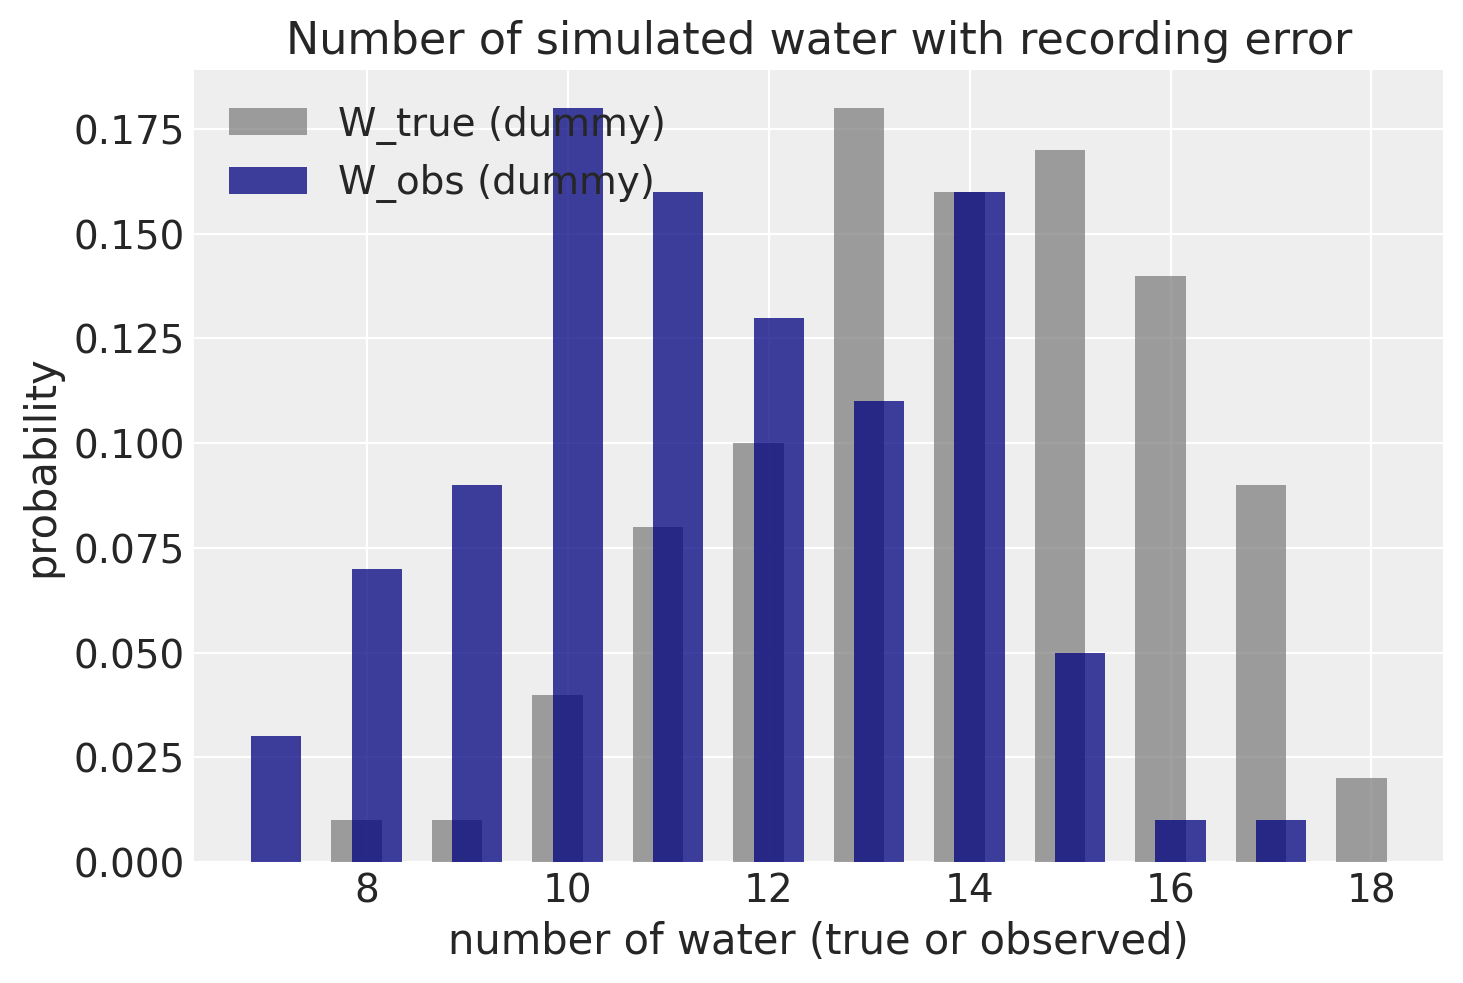

<IPython.core.display.Javascript object>

In [44]:
f, ax1 = plt.subplots()
ax1.bar(W_tr_dummy_dist.index-0.1, W_tr_dummy_dist, width=0.5, alpha=0.75, color='gray', label='W_true (dummy)')
ax1.bar(W_ob_dummy_dist.index+0.1, W_ob_dummy_dist, width=0.5, alpha=0.75, color='navy', label='W_obs (dummy)')

ax1.legend()
ax1.set(xlabel='number of water (true or observed)', ylabel='probability', title='Number of simulated water with recording error')

We can also get the proportion (expected value) of both sets of simulated data.

In [45]:
p_W_tr_dummy = W_tr_dummy.mean() / 20
p_W_ob_dummy = W_ob_dummy.mean() / 20

print("Proportion of true water by simulation: {0:0.3f}".format(p_W_tr_dummy))
print("Proportion of observed water by simulation: {0:0.3f}".format(p_W_ob_dummy))

Proportion of true water by simulation: 0.696
Proportion of observed water by simulation: 0.573


<IPython.core.display.Javascript object>

## Answer 2 (inference)

Here we're running the model in reverse. Our likelihood is the observed water data (`W_ob`) that we just generated but we now pretend we don't know our parameters `p_tr` or `p_ob`. We also wouldn't know `W_tr` because that's not what we observe. We know N, the true number of tosses is 20 because we are given that. We can use our model equations but this time put priors for p. We'll use fairly conservative, flat beta distribution for the priors.

$$ W_{ob} \sim \text{Binomial}(n_{ob}=W_{tr}, p_e) $$
$$ W_{tr} \sim \text{Binomial}(n_{tr}=20, p_{tr}) $$
$$ p_{tr} \sim \text{Beta}(\alpha = 1, \beta = 1) $$
$$ p_{e} \sim \text{Beta}(\alpha = 1, \beta = 1) $$

In [26]:
W_ob_dummy

array([ 8, 10, 13, 11, 10, 13, 14, 11,  9, 12, 10,  6,  8,  9, 12, 12, 13,
        8, 14, 10,  9, 12, 12,  8, 11, 13, 10, 12,  5, 13, 13, 12, 11, 11,
       12, 11,  8, 12, 10,  9, 10, 13, 13, 10, 11,  9, 10, 13,  8, 13, 11,
       11,  9,  8,  7, 11, 11, 14, 10, 14, 12, 12, 11, 12, 12, 11, 14, 13,
       13, 10, 10, 12, 15, 12, 14, 10, 10, 14, 10, 10,  7, 13, 10, 12, 12,
       11, 11, 13,  8, 10, 10,  9, 11,  9, 12, 11,  8,  9,  9, 13])

<IPython.core.display.Javascript object>

We can still use the grid approximation approach. The idea is to run the models in reverse.

In [27]:
stats.binom.pmf(k=[0, 1, 2, 3], n=100, p=0.7)

array([5.15377521e-53, 1.20254755e-50, 1.38894242e-48, 1.05868278e-46])

<IPython.core.display.Javascript object>

In [28]:
lik_w_tr = stats.binom.rvs(n=W_ob_dummy, p=0.8)
lik_w_tr

array([ 6,  8, 13,  9,  7, 12, 11, 10,  7, 11, 10,  6,  7,  8, 12,  8, 11,
        6, 10,  7,  6, 12,  8,  7, 10, 10,  9,  9,  4, 11, 12,  9,  8, 10,
       11,  9,  7, 11,  9,  8,  9, 11, 10,  9,  6,  7,  8, 10,  6, 12, 10,
        8,  5,  7,  4,  7, 10, 12,  9, 10, 10,  8, 11, 11, 10,  8, 12, 11,
       13,  8,  9, 10, 10,  9,  9,  9,  5,  9,  7,  5,  6, 11,  9,  6,  9,
       11,  8, 12,  7,  8,  8,  9,  9,  6, 11,  9,  7,  7,  8, 12])

<IPython.core.display.Javascript object>

In [29]:
stats.binom.pmf(k=range(5, 20), n=20, p=0.7)

array([3.73897689e-05, 2.18106985e-04, 1.01783260e-03, 3.85928193e-03,
       1.20066549e-02, 3.08170809e-02, 6.53695655e-02, 1.14396740e-01,
       1.64261985e-01, 1.91638983e-01, 1.78863051e-01, 1.30420974e-01,
       7.16036722e-02, 2.78458725e-02, 6.83933711e-03])

<IPython.core.display.Javascript object>

<BarContainer object of 15 artists>

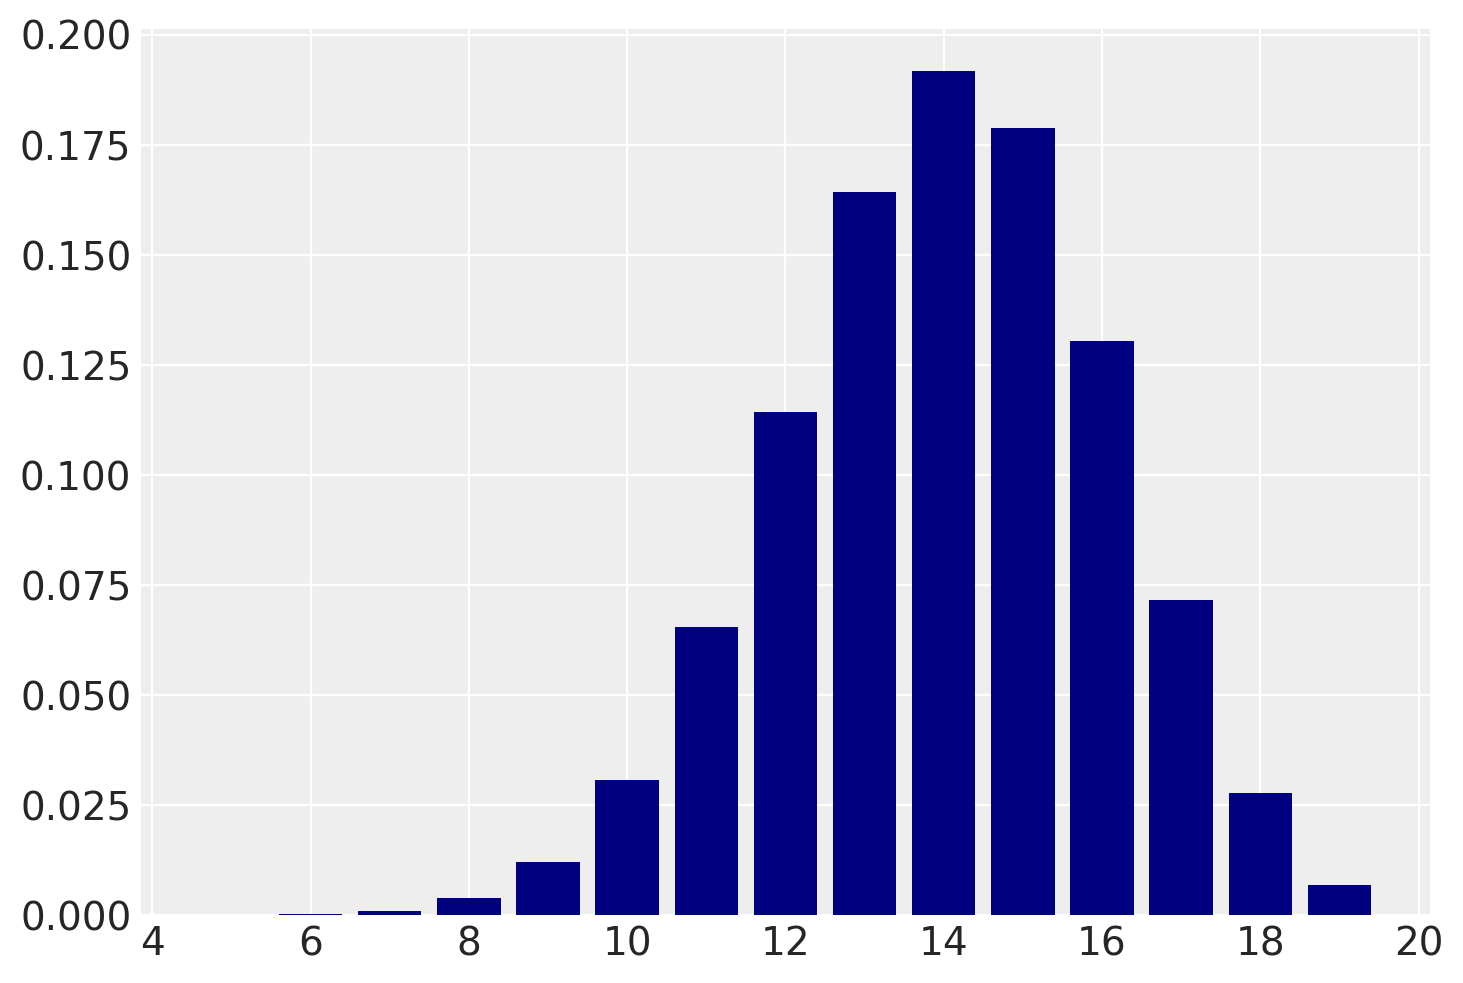

<IPython.core.display.Javascript object>

In [30]:
f, ax1 = plt.subplots()
ax1.bar(x=range(5, 20), height=stats.binom.pmf(k=range(5, 20), n=20, p=0.7), color='navy')

In [31]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
# highest posterior density interval
az.hdi(samples, hdi_prob=0.89)

array([0.50005001, 0.84008401])

<IPython.core.display.Javascript object>

In [32]:
# assign p 10000 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 10**4)
prior = [int(i) for i in (p_grid > 0.5)]
lik = stats.binom.pmf(k=4, n=6, p=p_grid)
unstd_posterior = lik * prior
posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

### Trivial approach

De-bias

In [33]:
W_ob_dummy_tr = np.floor(W_ob_dummy / 0.8)
W_ob_dummy_tr


array([10., 12., 16., 13., 12., 16., 17., 13., 11., 15., 12.,  7., 10.,
       11., 15., 15., 16., 10., 17., 12., 11., 15., 15., 10., 13., 16.,
       12., 15.,  6., 16., 16., 15., 13., 13., 15., 13., 10., 15., 12.,
       11., 12., 16., 16., 12., 13., 11., 12., 16., 10., 16., 13., 13.,
       11., 10.,  8., 13., 13., 17., 12., 17., 15., 15., 13., 15., 15.,
       13., 17., 16., 16., 12., 12., 15., 18., 15., 17., 12., 12., 17.,
       12., 12.,  8., 16., 12., 15., 15., 13., 13., 16., 10., 12., 12.,
       11., 13., 11., 15., 13., 10., 11., 11., 16.])

<IPython.core.display.Javascript object>

In [34]:
p_grid = np.linspace(0, 1, 10**2)
prior = [1 / 100] * 100
lik = stats.binom.pmf(k=W_ob_dummy_tr, n=20, p=p_grid)
unstd_posterior = lik * prior
posterior = unstd_posterior / np.sum(unstd_posterior)

posterior

array([0.00000000e+00, 2.78363138e-20, 7.30124023e-25, 2.41226322e-16,
       3.64176449e-13, 1.49920580e-18, 4.03144689e-19, 1.08827603e-11,
       1.60363026e-08, 4.89587068e-13, 1.28802168e-08, 7.44686168e-04,
       7.38141337e-06, 2.01189259e-06, 2.77968071e-10, 7.37471200e-10,
       1.10169623e-10, 1.32972636e-04, 3.43976271e-11, 1.21497188e-05,
       1.07081792e-04, 7.92031006e-08, 1.49201637e-07, 1.27805288e-03,
       2.35572580e-05, 8.78611307e-08, 2.51806059e-04, 2.30196488e-06,
       4.01314478e-02, 7.56118557e-07, 1.22790907e-06, 1.37388291e-05,
       4.50218245e-04, 6.04558763e-04, 4.38258439e-05, 1.04735557e-03,
       1.72808477e-02, 1.23016696e-04, 5.68649888e-03, 1.39576976e-02,
       8.06007546e-03, 9.07994990e-05, 1.24542575e-04, 1.26452902e-02,
       7.10188072e-03, 2.60989686e-02, 1.82853828e-02, 5.21685628e-04,
       3.70893033e-02, 8.68654489e-04, 1.66698760e-02, 1.86659760e-02,
       3.66994332e-02, 3.56017670e-02, 1.63118554e-02, 2.70915250e-02,
      

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'p'),
 Text(0, 0.5, 'probability'),
 Text(0.5, 1.0, 'Posterior probability of water')]

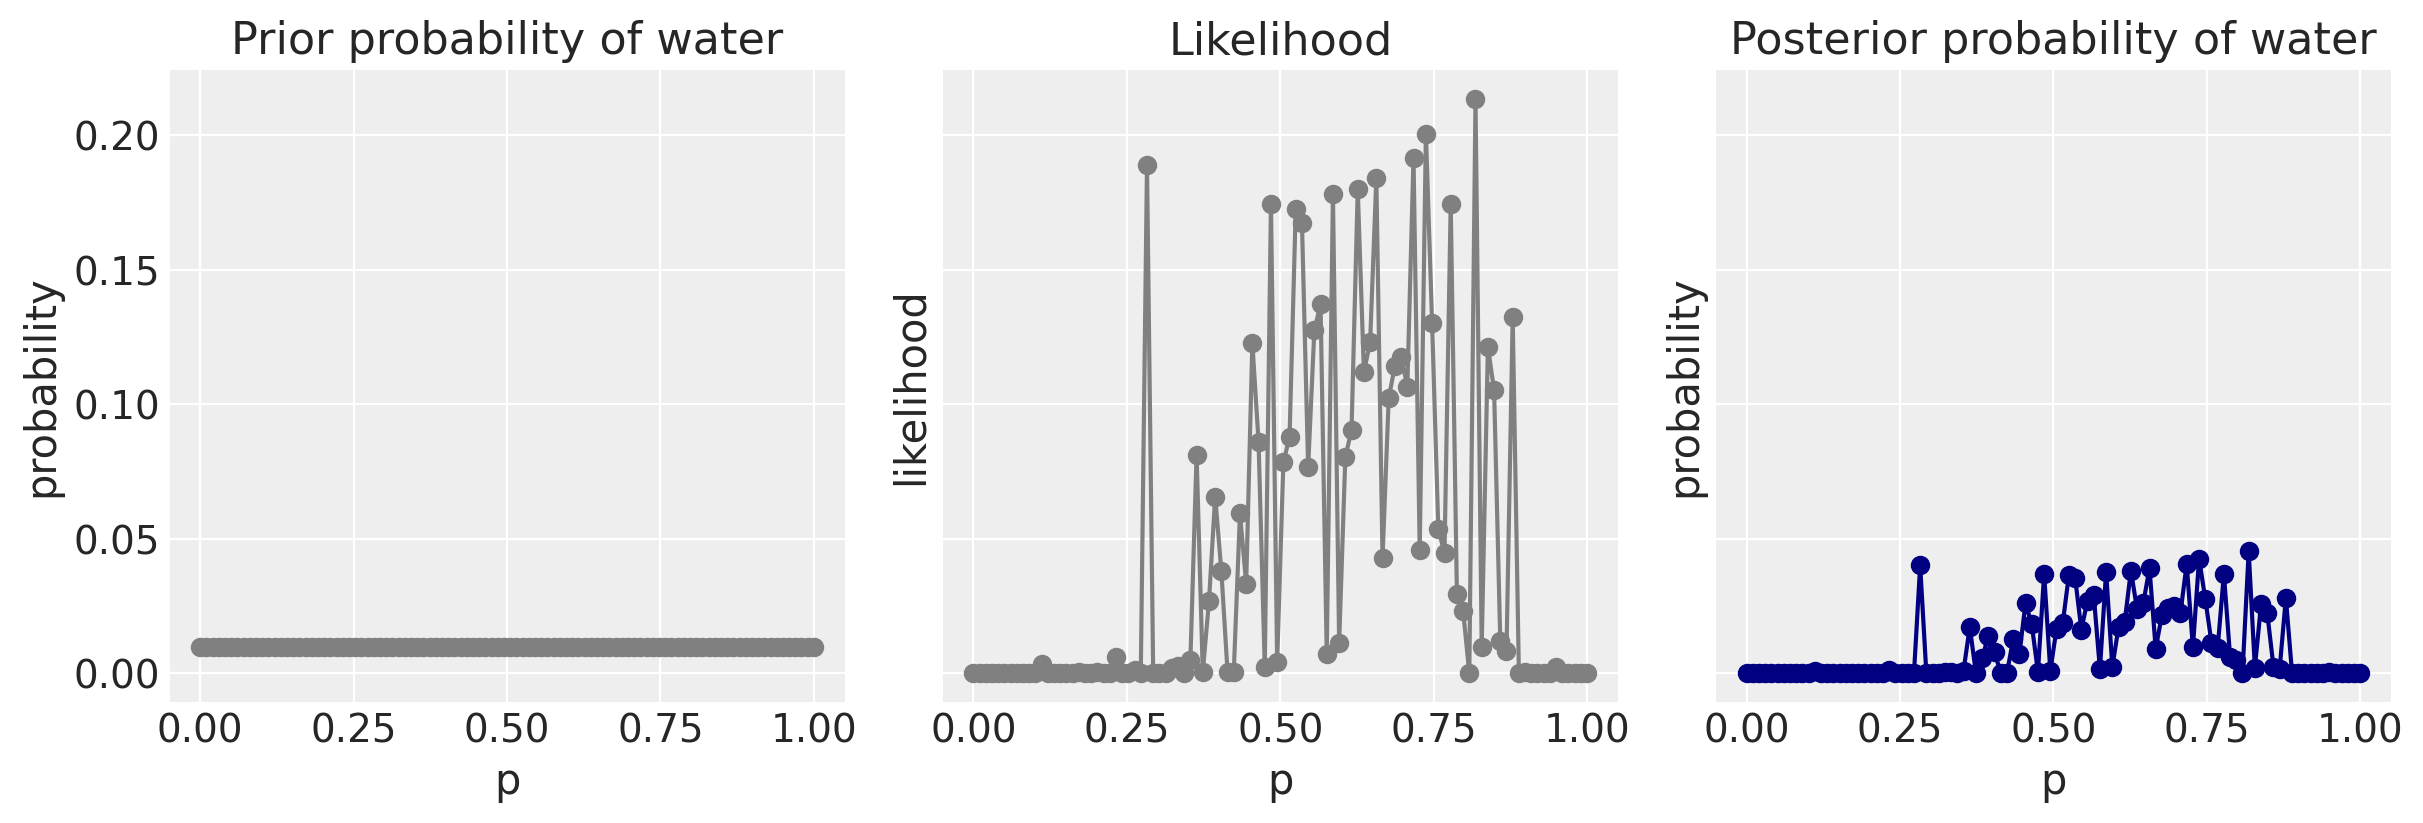

<IPython.core.display.Javascript object>

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
# prior
ax1.plot(p_grid, prior, '-o', color="gray")
ax1.set(xlabel='p', ylabel='probability', title='Prior probability of water')

# likelihood
ax2.plot(p_grid, lik, '-o', color="gray")
ax2.set(xlabel='p', ylabel='likelihood', title='Likelihood')

# posterior
ax3.plot(p_grid, posterior, '-o', color="navy")
ax3.set(xlabel='p', ylabel='probability', title='Posterior probability of water')

### Leo's approach

$$ Pr (p_{tr} | 1 W)  = \frac{Pr(1 W | p_{tr}) \times Pr(p_{tr})}{Pr(1 W)}$$


In [57]:
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<IPython.core.display.Javascript object>

In [58]:
stats.binom.pmf(20, n=20, p=0.7) * p_grid

array([0.00000000e+00, 4.19959296e-05, 8.39918593e-05, 1.25987789e-04,
       1.67983719e-04, 2.09979648e-04, 2.51975578e-04, 2.93971507e-04,
       3.35967437e-04, 3.77963367e-04, 4.19959296e-04, 4.61955226e-04,
       5.03951156e-04, 5.45947085e-04, 5.87943015e-04, 6.29938944e-04,
       6.71934874e-04, 7.13930804e-04, 7.55926733e-04, 7.97922663e-04])

<IPython.core.display.Javascript object>

In [55]:
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<IPython.core.display.Javascript object>

In [ ]:
W_ob_dummy_tr

In [51]:
# assign p 20 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 20)

# Since they must sum to 1, the probability of each parameter value should be the same (1/11):
prior = [1 / 20] * 20

# Next we compute the likelihood, by plugging in a p value and computing the binomial probability distribution for each p. For our binomial distribution parameters, we are asked to assume the globe tossing data of 4 water and 11 land, hence k=4 and n=15.
lik = stats.binom.pmf(k=4, n=15, p=p_grid)

# compute product of likelihood and prior
unstd_posterior = lik * prior

# standardized posterior
posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

In [52]:
posterior

array([0.00000000e+00, 4.86613500e-03, 4.15187925e-02, 1.07892542e-01,
       1.67660367e-01, 1.91635078e-01, 1.75860569e-01, 1.35074219e-01,
       8.84842719e-02, 4.96771457e-02, 2.37604248e-02, 9.52241697e-03,
       3.10448826e-03, 7.84555661e-04, 1.42026305e-04, 1.60772416e-05,
       8.79023184e-07, 1.29512663e-08, 7.94834331e-12, 0.00000000e+00])

<IPython.core.display.Javascript object>

### Using pymc

In [36]:
# We will use the data observed above as our likelihood

# Infer the parameter
with pm.Model() as m_q4b:

    # priors
    p_tr = pm.Beta("p_tr", alpha=4, beta=1)
    # p_e = pm.Beta("p_e", alpha=2, beta=2, shape=100)
    p_e = 0.8

    # distributions of W_tr and W_ob
    W_tr = pm.Binomial("W_tr", n=20, p=p_tr)
    W_ob = pm.Binomial("W_ob", n=W_tr, p=p_e, observed=W_ob_dummy)
    
    # posterior
    idata_q4b = pm.sample(
        draws=1000, random_seed=19, return_inferencedata=True, progressbar=False
    )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p_tr]
>Metropolis: [W_tr]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.
/Users/blacar/opt/anaconda3/envs/stats_rethinking/lib/python3.8/site-packages/arviz/stats/diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The acceptance probability does not match the target. It is 0.8997386173527404, but should be close to 0.8. Try to increase the number of tuning steps.


<IPython.core.display.Javascript object>

In [37]:
az.summary(idata_q4b)

/Users/blacar/opt/anaconda3/envs/stats_rethinking/lib/python3.8/site-packages/arviz/stats/diagnostics.py:642: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
W_tr,15.00,0.000,15.000,15.000,0.000,0.000,4000.0,4000.0,4000.0,4000.0,NaN
p_tr,0.76,0.082,0.636,0.891,0.002,0.001,1755.0,1721.0,1739.0,2520.0,1.0


<IPython.core.display.Javascript object>

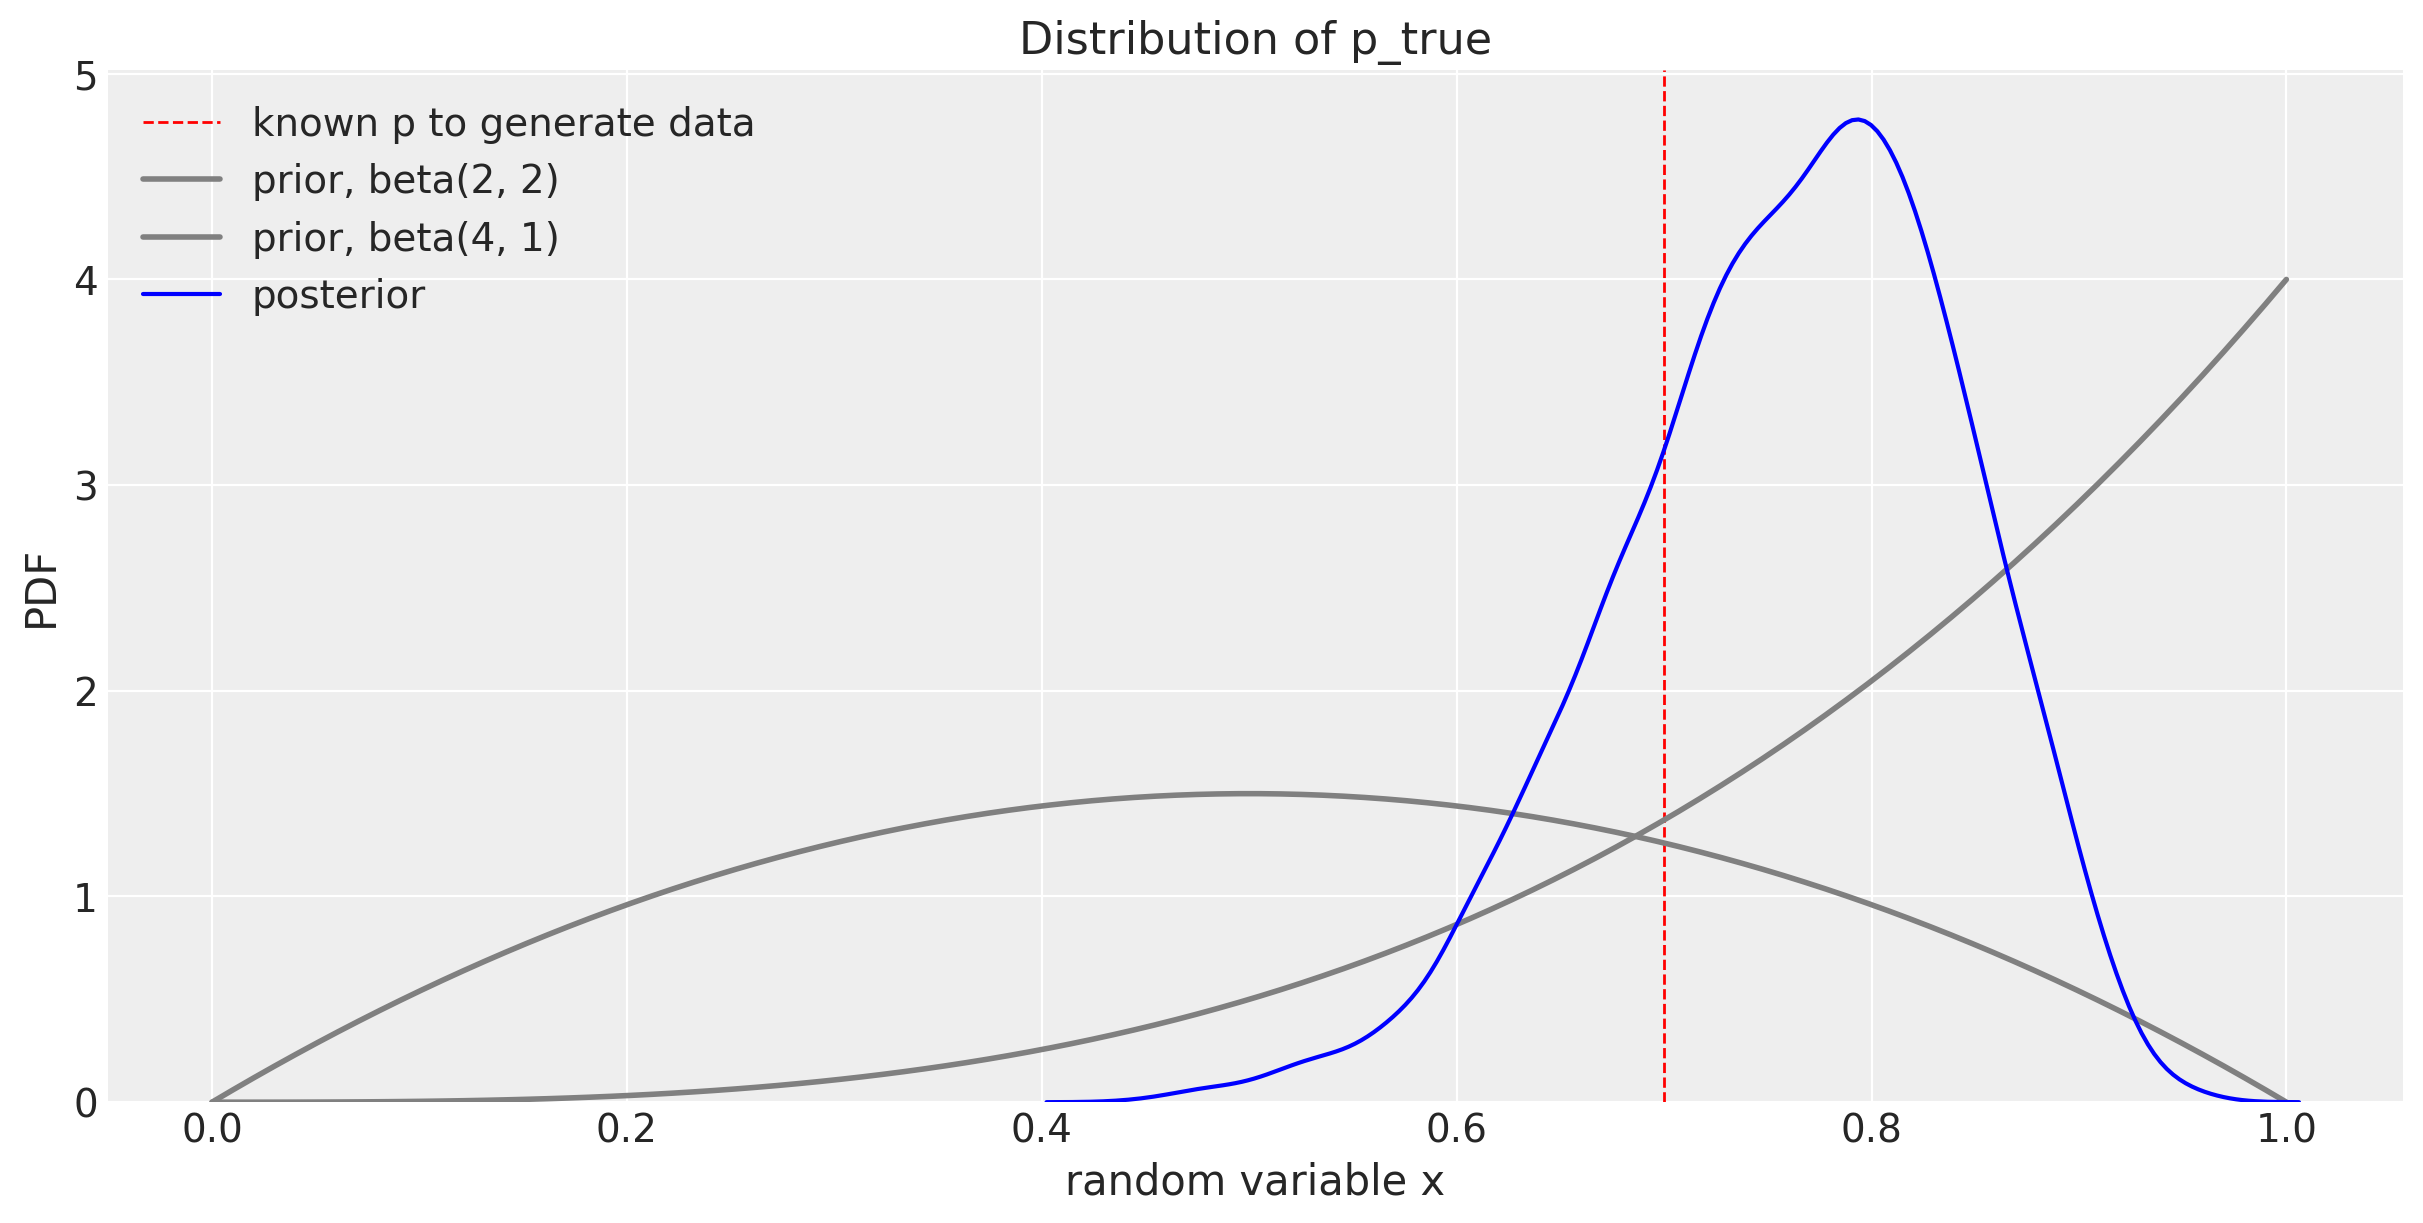

<IPython.core.display.Javascript object>

In [38]:
a = 2
b = 2

f, ax1 = plt.subplots(figsize=(12, 6))

# known parameter to generate data
ax1.axvline(
    0.7, lw=1, color="red", linestyle="dashed", label="known p to generate data"
)

# prior
x = np.linspace(stats.beta.ppf(0.00, a, b), stats.beta.ppf(1.00, a, b), 100)
prior_label = "prior, beta(" + str(a) + ", " + str(b) + ")"
ax1.plot(x, stats.beta.pdf(x, a, b), lw=2, color="gray", label=prior_label)

# prior
x = np.linspace(stats.beta.ppf(0.00, 4, 1), stats.beta.ppf(1.00, 4, 1), 100)
prior_label2 = "prior, beta(" + str(4) + ", " + str(1) + ")"
ax1.plot(x, stats.beta.pdf(x, 4, 1), lw=2, color="gray", label=prior_label2)

# Make the posterior values accessible and plot
df_trace_q4b = idata_q4b.to_dataframe()
sns.kdeplot(df_trace_q4b[("posterior", "p_tr")], ax=ax1, color="blue", label="posterior")

ax1.set_title("Distribution of p_true")
ax1.set_xlabel("random variable x")
ax1.set_ylabel("PDF")
ax1.legend()

Appendix: Environment and system parameters

In [39]:
%watermark -n -u -v -iv -w

Last updated: Tue Jan 11 2022

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.20.0

pandas    : 1.2.1
scipy     : 1.6.0
daft      : 0.1.0
seaborn   : 0.11.1
pymc3     : 3.11.0
numpy     : 1.20.1
arviz     : 0.11.1
sys       : 3.8.6 | packaged by conda-forge | (default, Jan 25 2021, 23:22:12) 
[Clang 11.0.1 ]
matplotlib: 3.3.4

Watermark: 2.1.0



<IPython.core.display.Javascript object>